In [1]:
#ALL IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time

# Load MNIST data

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


In [3]:
mnist['DESCR']
X,y=mnist['data'],mnist['target']
print(X.shape,y.shape)

X=X/255.0
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10000)
X_train.shape,X_test.shape

(70000, 784) (70000,)


((60000, 784), (10000, 784))

# Compare time with and without PCA

In [4]:
from sklearn.pipeline import Pipeline

without_pca=Pipeline([('rfr',RandomForestClassifier())])
with_pca=Pipeline(
    [('pca',PCA(n_components=0.95)),
    ('rfr',RandomForestClassifier())])

In [5]:
t_start=time.time()
without_pca.fit(X_train,y_train)
t_stop=time.time()
print("Time Taken ={}".format(t_stop-t_start))
print("Test Score without PCA = ",accuracy_score(y_test,without_pca.predict(X_test)))

Time Taken =40.60304665565491
Test Score without PCA =  0.9704


In [6]:
t_start=time.time()
with_pca.fit(X_train,y_train)
t_stop=time.time()
print("Time Taken ={}".format(t_stop-t_start))
print("Score =",accuracy_score(y_test,with_pca.predict(X_test)))

Time Taken =120.59573888778687
Score = 0.9506


# t-SNE

CPU times: user 1h 53min 47s, sys: 1.76 s, total: 1h 53min 49s
Wall time: 1h 42min 47s


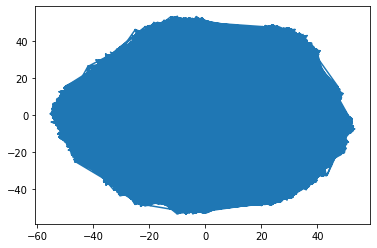

In [7]:
%%time
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)
X_embedded=tsne.fit_transform(X_train)
plt.plot(X_embedded[:,0],X_embedded[:,1])

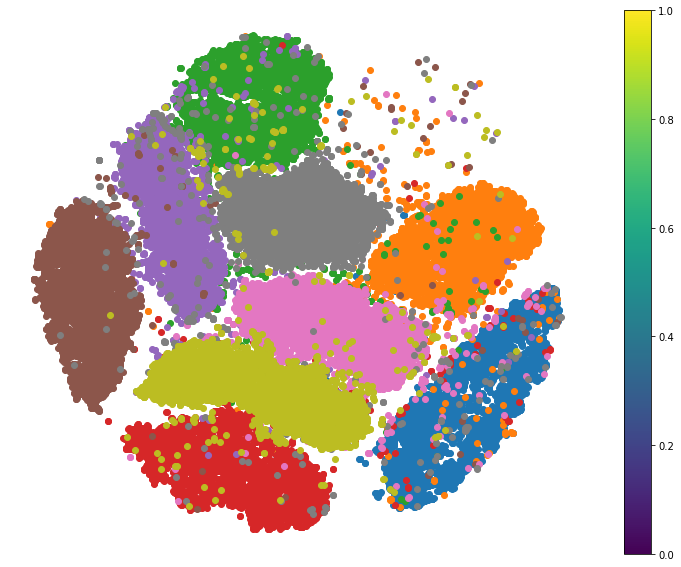

In [21]:
plt.figure(figsize=(13,10))

plt.scatter(X_embedded[:,0][y_train=='1'],X_embedded[:,1][y_train=='1'])
plt.scatter(X_embedded[:,0][y_train=='2'],X_embedded[:,1][y_train=='2'])
plt.scatter(X_embedded[:,0][y_train=='3'],X_embedded[:,1][y_train=='3'])
plt.scatter(X_embedded[:,0][y_train=='4'],X_embedded[:,1][y_train=='4'])
plt.scatter(X_embedded[:,0][y_train=='5'],X_embedded[:,1][y_train=='5'])
plt.scatter(X_embedded[:,0][y_train=='6'],X_embedded[:,1][y_train=='6'])
plt.scatter(X_embedded[:,0][y_train=='7'],X_embedded[:,1][y_train=='7'])
plt.scatter(X_embedded[:,0][y_train=='8'],X_embedded[:,1][y_train=='8'])
plt.scatter(X_embedded[:,0][y_train=='9'],X_embedded[:,1][y_train=='9'])

plt.axis('off')
plt.colorbar()
plt.show()